In [2]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
rm -rf ./../../logs/

In [3]:
import sys
sys.path.append("..")

import numpy as np
import data_frame
import models
import importlib
import evaluator as ev
import matplotlib.pyplot as plt

In [4]:
filePath = "../../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [8]:
# df.data.loc[df.data["faint"], "MAG_GAAP_r"].max()

/home/kdrabicki/anaconda3/envs/test_env/lib/python3.12/site-packages/tf_keras/src/saving/serialization_lib.py:159: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         lambda t: MixtureNormal.new(  # pylint: disable=g-long-lambda
            t, num_components, event_shape, validate_args),

  config_arr = [serialize_keras_object(x) for x in obj]


Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 33.
439/439 [==============================] - 0s 172us/step - loss: 0.0000e+00
0.0


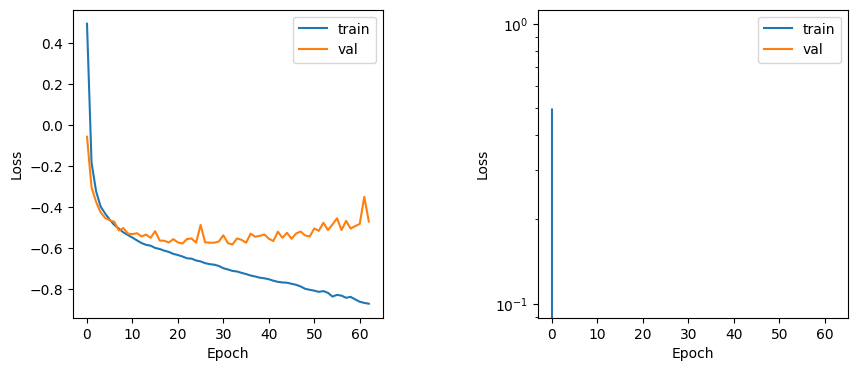

In [54]:
importlib.reload(models)

model = models.MLModelContext(strategy=models.ANNDoubleGauss(df))
model.train()
model.test_predict()

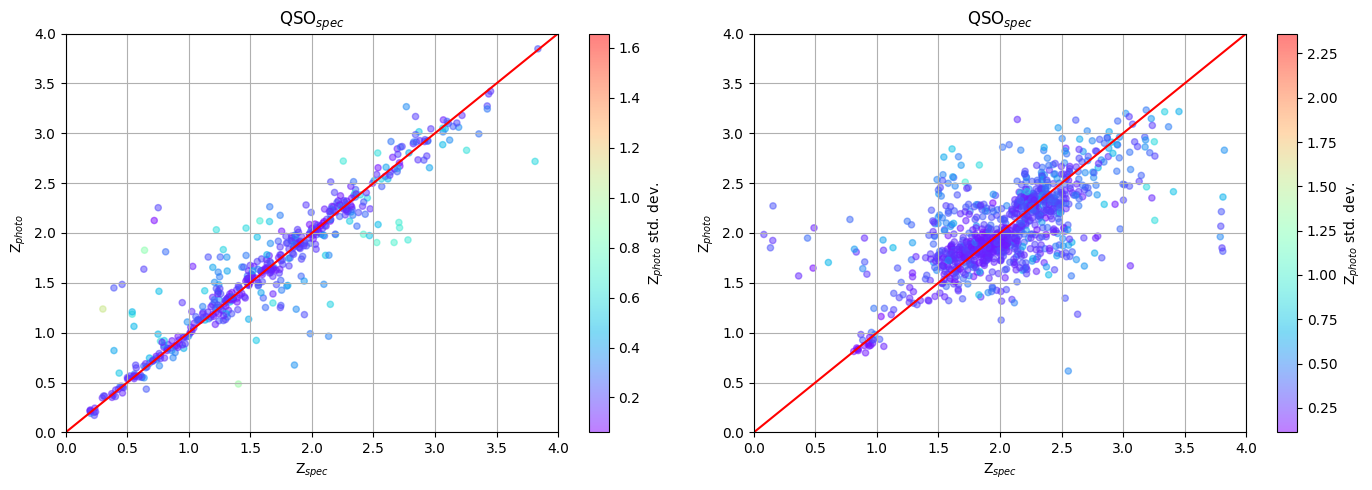

,MSE,R^2,Redshift error
test,0.095216,0.830105,"(0.01119032770741887, 0.13233540977319705)"
faint,0.216754,0.365035,"(0.008958041388558973, 0.1686219634572033)"


In [55]:
importlib.reload(ev)

evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()

In [1]:
# %tensorboard --logdir ../../logs/fit --port 6006

In [24]:
df.data[df.data["split"] == "test"].to_csv("../../double_gaussian_output")

In [23]:
y_test = y_test[:1]
ngg = -y_model.log_prob(y_test)
ngg

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.7731817], dtype=float32)>

tf.Tensor([[1.5486004]], shape=(1, 1), dtype=float32) 1.5489727 0.044650197
tf.Tensor([[1.6107445]], shape=(1, 1), dtype=float32) 1.5470493 0.21175975
tf.Tensor([[1.8902235]], shape=(1, 1), dtype=float32) 1.8970137 0.06659126
tf.Tensor([[2.167985]], shape=(1, 1), dtype=float32) 2.2002015 0.41357982
tf.Tensor([[1.5236831]], shape=(1, 1), dtype=float32) 1.6693746 0.52877176
tf.Tensor([[2.6288116]], shape=(1, 1), dtype=float32) 2.670032 0.15395355
tf.Tensor([[2.4645329]], shape=(1, 1), dtype=float32) 2.4713826 0.052626014
tf.Tensor([[0.8404422]], shape=(1, 1), dtype=float32) 0.83287066 0.055615544
tf.Tensor([[2.1629338]], shape=(1, 1), dtype=float32) 2.275556 0.39233166


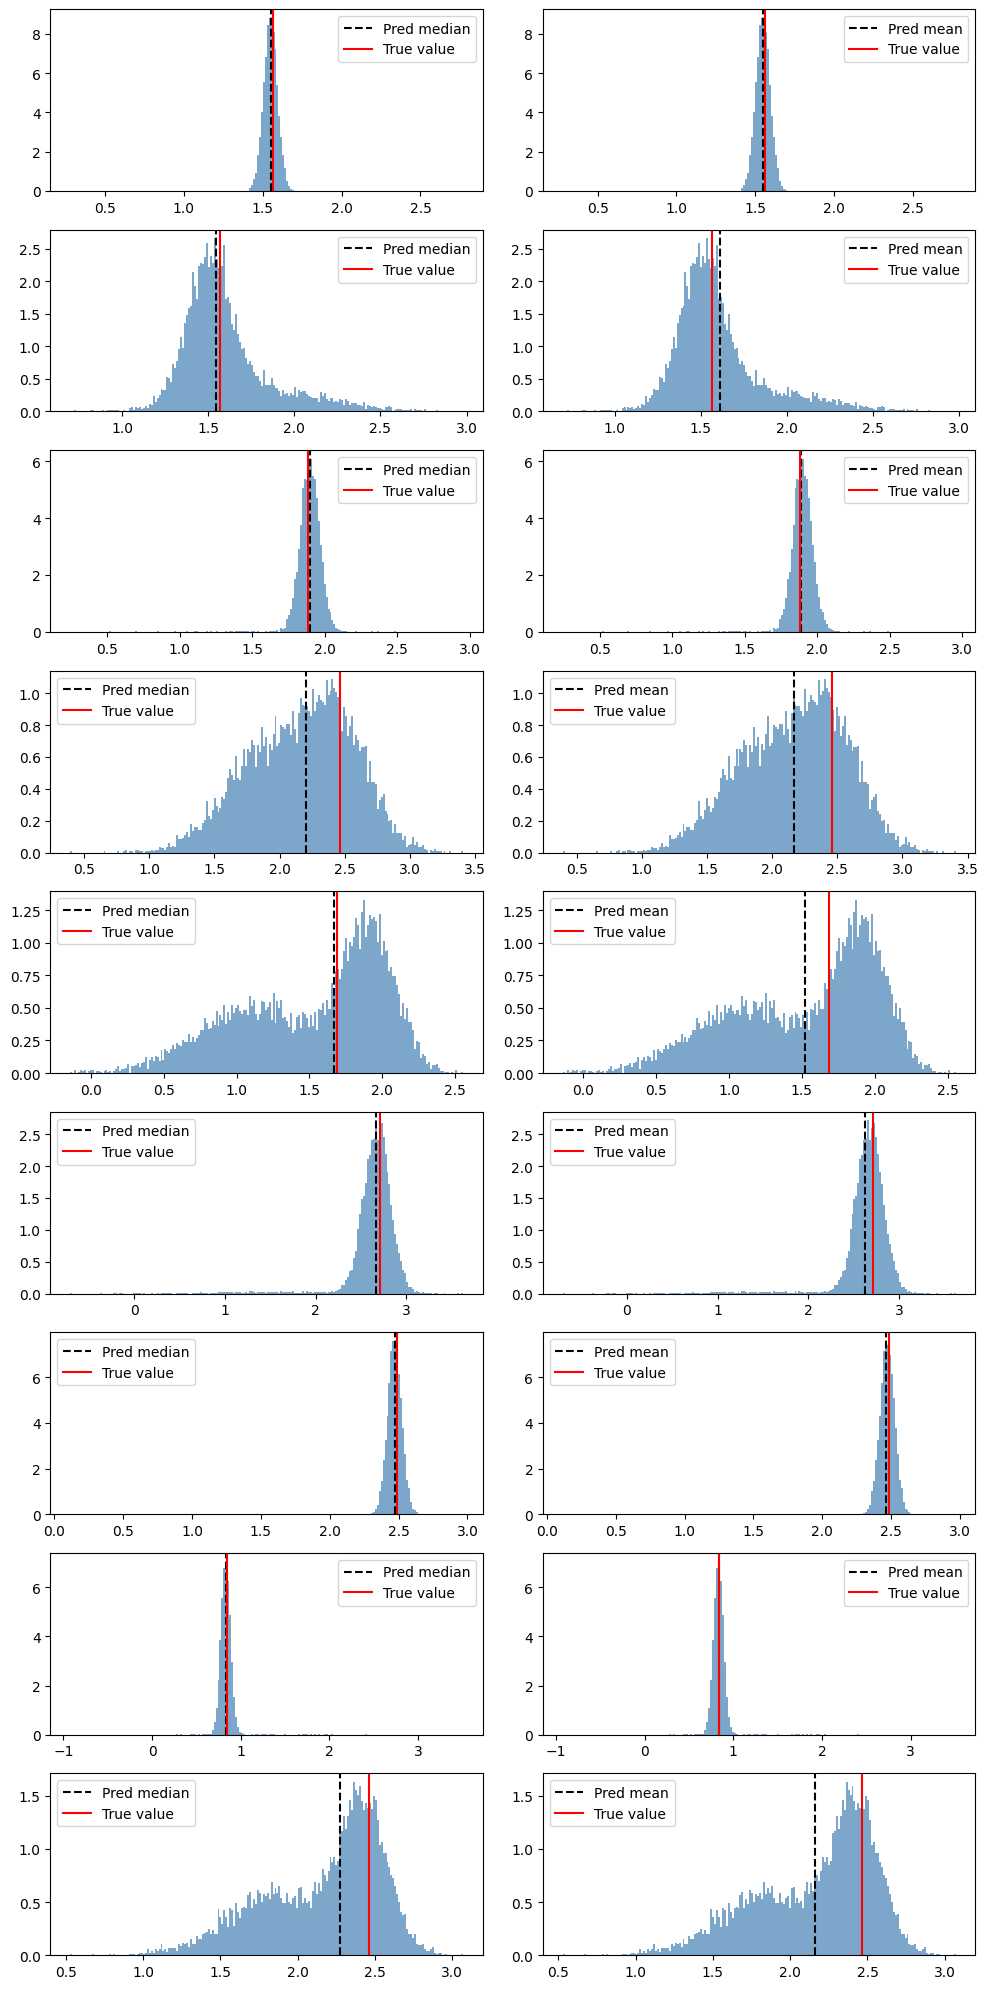

In [38]:
X_test = model.strategy.X_test
y_test = model.strategy.y_test
raw_model = model.strategy.network
scaler = model.strategy.scaler
X_test = scaler.transform(X_test)

fig, axes = plt.subplots(9, 2, figsize=(10, 20))

for ax, i in zip(axes, range(9)):
    x_input = X_test[i:i+1]
    y_model = raw_model(x_input)

    y_sample = y_model.sample(10000).numpy().reshape(-1)

    ax[0].hist(y_sample, bins=200, density=True, alpha=0.7, color='steelblue')
    ax[0].axvline(np.median(y_sample), color='black', linestyle='--', label='Pred median')
    ax[0].axvline(y_test.values[i], color='red', linestyle='-', label='True value')
    ax[0].legend()

    ax[1].hist(y_sample, bins=200, density=True, alpha=0.7, color='steelblue')
    ax[1].axvline(y_model.mean(), color='black', linestyle='--', label='Pred mean')
    ax[1].axvline(y_test.values[i], color='red', linestyle='-', label='True value')
    ax[1].legend()

    lower = np.percentile(y_sample, 16, axis=0)
    upper = np.percentile(y_sample, 84, axis=0)
    std = (upper - lower) / 2
    
    print(y_model.mean(), np.median(y_sample), std)

plt.tight_layout()
plt.show()
# # x=7357 Large redshift
# # x=3 Two modes
# x = 7357
# y_model = raw_model(X_test[x:x+1])
# y_sample = y_model.sample(1000000).numpy().reshape(-1)
# print(np.median(y_sample))
# print(y_test.values[x])
# print(y_model.mean())
# print(y_model.stddev())
# plt.hist(y_sample, bins=1000)
# # plt.xlim(1.2,1.8)
# plt.show()

# means = y_model.components_distribution.distribution.loc.numpy()
# stds = y_model.components_distribution.distribution.scale.numpy() 
# means, stds

In [16]:
# df.data[df.data["Z_pred"] == df.data["Z_pred"].max()]

In [17]:
# y_test[7357:7370]

(array([[[1.5424895],
         [1.5484366]]], dtype=float32),
 array([[[0.04458575],
         [0.7483189 ]]], dtype=float32))